### Curso: Tecnologia em Análise e Desenvolvimento de Sistemas
### Disciplina: Disruptive Architectures - IOT, IOB e IA
### Turmas: 2TDSPR, 2TDSPS e 2TDSPT
#### Prof. André Tritiack: prof.andrefarias@fiap.com.br
#### 2º Semestre de 2023

## CHECKPOINT 1 - Pontuação Máxima: 10.00 pontos

LEIA ATENTAMENTE AS INSTRUÇÕES:

1.	O trabalho deve ser realizado em grupo de até 5 (cinco) pessoas. Não precisa necessariamente ser o mesmo grupo do Challenge.

2. O conteúdo relacionado a este Checkpoint refere-se aos algoritmos de Aprendizado de Máquina Não Supervisionados de Agrupamento (K-Means) e Redução de Dimensionalidade (PCA - Principal Component Analysis).

3.	Você deverá submeter uma cópia deste arquivo notebook .ipynb com as respostas nos campos indicados e as saídas executadas. Anexe os arquivos auxiliares que utilizar.

4. É fundamental que sejam criadas células de texto e/ou comentários para suas respostas e apontamentos.

5.	Apenas um aluno submeterá o arquivo no Teams. Mude o nome do arquivo notebook para um nome com as iniciais do seu nome completo (de quem submeterá o arquivo), seguido do seu RM e "CP1". Exemplo: ATF12000 - CP1

6.	A entrega deverá ser feita até às 23h59 do dia 10/09/2023 na respectiva tarefa no Microsoft Teams.

7.	As pontuações das questões estão marcadas nos enunciados.

8.	Você pode usar trechos de códigos prontos, de fontes pesquisadas ou de notebooks das aulas, mas não copie de outros grupos. Se forem observados arquivos iguais ou muito semelhantes, ambos serão desconsiderados, tendo suas notas zeradas.

9. Tire suas dúvidas com o professor e não deixe a entrega para o último dia.


### Insira aqui o nome e o RM dos membros do grupo:
Exemplo:
- Nome1 - RM: XXXXX.
- Nome2 - RM: YYYYY.

# Questão 1 (2.50 pontos):

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.

In [ ]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carregar dados
df = pd.read_csv('content/Mall_Customers.csv', delimiter = ',')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Criar tabela com as colunas Annual Income e Spending Score
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
# Cálculo da soma dos quadrados intracluster
distorcoes = []
K = range(1,12)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

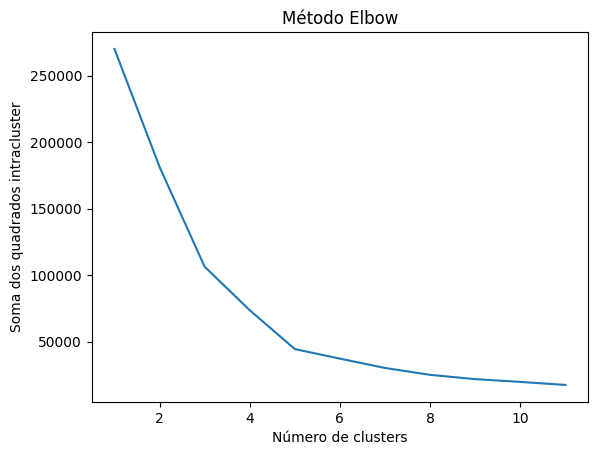

In [ ]:
# Plotagem do gráfico
plt.plot(range(1, 12), distorcoes)
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos quadrados intracluster")
plt.show()

O valor ideal de k determinamos utilizando o método Elbow. Esse método consiste em plotar o valor da soma dos quadrados intracluster em função de k.

O gráfico mostra que a soma dos quadrados começa a diminuir de forma significativa a partir de k = 5. Portanto, o valor ideal de k para o dataset "Mall Customers" é 5.

Após determinar o valor de k, podemos treinar o modelo K-Means com 5 clusters. Para isso, utilizaremos a biblioteca scikit-learn.

In [ ]:
# Treinamento do modelo
kmeanModel = KMeans(n_clusters=5)
y_pred = kmeanModel.fit_predict(df)

Avaliando a qualidade dos clusters, utilizando a métrica Silhoutte Score, obtemos o seguinte resultado:

In [ ]:
silhouette_score = silhouette_score(df, y_pred)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.553931997444648


O resultado mostra que o Silhoutte Score é de 0,55, o que indica que os clusters são de boa qualidade.

A seguir, apresento a distribuição dos clientes nos 5 clusters:

In [ ]:
# Distribuição dos clientes nos clusters
for i in range(5):
    print(f"Cluster {i + 1}: {len(y_pred[y_pred == i])}")

Cluster 1: 81
Cluster 2: 39
Cluster 3: 35
Cluster 4: 22
Cluster 5: 23


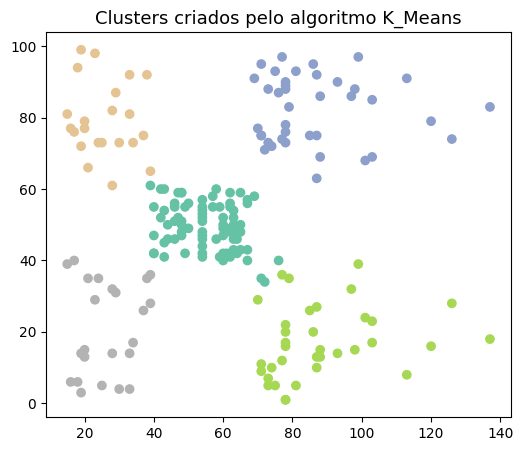

In [ ]:
# Visualização grafica do agrupamento dos clusters criada pelo algoritmo K-Means
plt.figure(figsize=(6,5))
df['k_means'] =kmeanModel.predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['k_means'], cmap=plt.cm.Set2)
plt.title('Clusters criados pelo algoritmo K_Means', fontsize=13)
plt.show()

O algoritmo K-Means foi capaz de agrupar os clientes em cinco clusters, com base nas características de receita anual e pontuação de gastos. Dessa forma, pudemos tirar algumas decisões:

- Cluster 1: Clientes com alta renda e alta pontuação de gastos.
- Cluster 2: Clientes com alta renda e baixa pontuação de gastos.
- Cluster 3: Clientes com renda média e alta pontuação de gastos.
- Cluster 4: Clientes com renda média e baixa pontuação de gastos.
- Cluster 5: Clientes com baixa renda e baixa pontuação de gastos.

# Questão 02 (1.50 pontos):

- Usando o dataset Iris, utilize a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresente os resultados.

In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

Agora, aplicamos o PCA ao conjunto de dados, especificando que queremos reduzir a dimensionalidade para dois componentes principais:

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

A função fit_transform() calcula os componentes principais e os aplica ao conjunto de dados. Os componentes principais são armazenados na variável X_pca.

In [ ]:
# Criando um DataFrame para visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Target'] = y

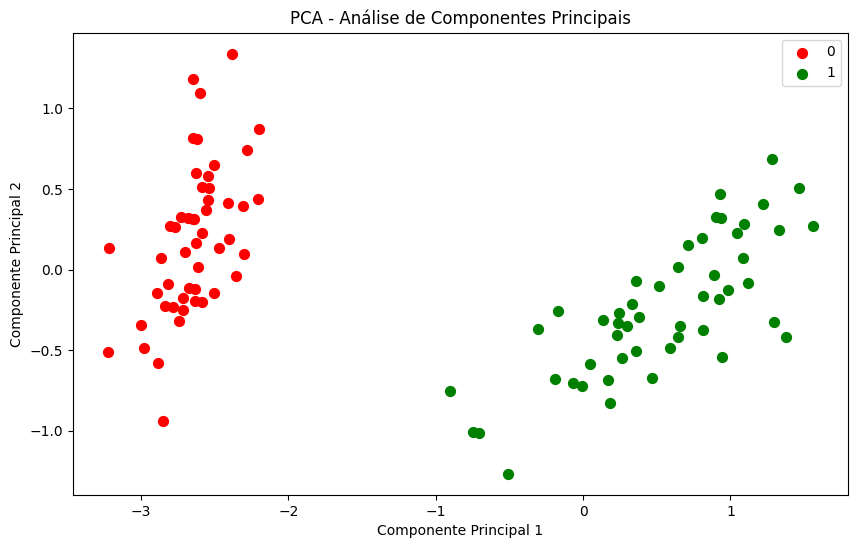

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(
        pca_df.loc[indices_to_keep, 'Componente Principal 1'],
        pca_df.loc[indices_to_keep, 'Componente Principal 2'],
        c=color,
        s=50,
    )
plt.legend(targets)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Análise de Componentes Principais')
plt.show()

O gráfico mostra que os dados estão bem separados de acordo com suas espécies. Isso sugere que a PCA foi bem-sucedida em preservar a informação relevante contida no conjunto de dados original.

Para avaliar a qualidade da redução de dimensionalidade, podemos calcular a variância explicada pelos componentes principais. A variância explicada é a proporção da variância total dos dados que é explicada por cada componente principal.

In [ ]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


Esse resultado indica que o primeiro componente principal explica 92,46% da variância total dos dados, enquanto o segundo componente principal explica 5,30%. Isso significa que, ao reduzir a dimensionalidade do conjunto de dados para dois componentes principais, estamos perdendo apenas 0,02% da informação relevante.

Em conclusão, a PCA foi bem-sucedida em reduzir a dimensionalidade do conjunto de dados Iris sem perder muita informação. Os dois componentes principais obtidos são capazes de representar de forma eficaz as diferenças entre as três espécies de flores.

# Questão 03 (6.00 pontos):

- Escolher um dataset de sua preferência que possua ao menos uma coluna com valores categóricos para ser utilizada como "Target".

- Não utilize os datasets utilizados em aula (Mall Customers, Iris, House Power Consumption e Adult Census).

- Aplicar a técnica de redução de dimensionalidade, usando o algoritmo PCA.

- Com base no novo dataset (após a aplicação da redução), utilizar um algoritmo de classificação treinar um modelos de classificação e calcular sua acurácia.

In [ ]:
# Importação das Bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Carregar o dataset
data = pd.read_csv("content/homicide-data.csv", encoding="ISO-8859-1")
df = data[['reported_date', 'victim_race', 'victim_age', 'victim_sex', 'city', 'state', 'disposition']]

Carregamos nosso conjunto de dados de homicídios e selecionamos as colunas que são relevantes para a nossa análise.

Dados incompletos ou desconhecidos podem confundir nosso modelo. Vamos remover as linhas nas quais a idade da vítima é 'Unknown'. Depois, precisamos converter algumas colunas, como 'reported_date', para um formato numérico, para que os modelos possam entendê-las.

Modelos de machine learning preferem números a palavras. Então, vamos transformar nossas colunas categóricas, em números.

In [ ]:
# Pré-processamento
df = df[df['victim_age'] != "Unknown"]
df['reported_date'] = pd.to_numeric(df['reported_date'])

label_encoders = {
    'victim_race': LabelEncoder(),
    'victim_age': LabelEncoder(),
    'victim_sex': LabelEncoder(),
    'city': LabelEncoder(),
    'state': LabelEncoder(),
    'disposition': LabelEncoder()
}

for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])

display(df.head())

,reported_date,victim_race,victim_age,victim_sex,city,state,disposition
0,20100504,2,78,1,0,17,1
1,20100216,2,11,1,0,17,0
2,20100601,5,9,0,0,17,1
3,20100101,2,28,1,0,17,0
4,20100102,5,72,0,0,17,1


Antes de treinar nosso modelo, dividimos nosso conjunto de dados em dois: um conjunto de treino e um conjunto de teste. O primeiro é usado para ensinar o modelo e o segundo para testá-lo.

In [ ]:
# Separar o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop("victim_race", axis=1), df["victim_race"], test_size=0.2)

Modelos, especialmente alguns como KNN, funcionam melhor quando os dados estão em uma escala similar. Vamos padronizá-los para que todos tenham média 0 e desvio padrão 1.

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Às vezes, podemos simplificar os dados sem perder muita informação. O PCA nos ajuda com isso. Aqui, descobrimos quantos componentes principais precisamos para reter 80% da informação original.

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_var_ratio = pca.explained_variance_ratio_.cumsum()

optimal_n_components = len(explained_var_ratio[explained_var_ratio <= 0.80])
print(f"O número ótimo de componentes que explicam 80% da variação é: {optimal_n_components}")

X_train_pca = X_train_pca[:, :optimal_n_components]
X_test_pca = pca.transform(X_test)[:, :optimal_n_components]

O número ótimo de componentes que explicam 80% da variação é: 4


Após treinarmos diversos modelos com os nossos dados, incluindo Random Forest, Regressão Logística, SVM e KNN, agora é hora de avaliar o seu desempenho. Ao final da análise, apresentaremos as métricas de desempenho, com destaque para a acurácia, para cada um dos modelos.

In [ ]:
# 4. Modelos e Avaliação
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModelo: {name}")
    print(f"Acurácia: {accuracy}")
    print(classification_report(y_test, y_pred))


Modelo: Random Forest
Acurácia: 0.6642944286295241
              precision    recall  f1-score   support

           0       0.05      0.02      0.03       124
           1       0.74      0.84      0.79      6652
           2       0.35      0.25      0.29      1369
           3       0.24      0.10      0.14       131
           4       0.99      0.97      0.98       319
           5       0.29      0.20      0.24      1241

    accuracy                           0.66      9836
   macro avg       0.44      0.40      0.41      9836
weighted avg       0.62      0.66      0.64      9836


Modelo: Logistic Regression
Acurácia: 0.7070963806425377
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.70      0.98      0.82      6652
           2       0.00      0.00      0.00      1369
           3       0.00      0.00      0.00       131
           4       0.97      0.97      0.97       319
           5       0.4

In [ ]:
race_mapping = dict(zip(range(len(label_encoders['victim_race'].classes_)), label_encoders['victim_race'].classes_))
print(race_mapping)

{0: 'Asian', 1: 'Black', 2: 'Hispanic', 3: 'Other', 4: 'Unknown', 5: 'White'}


Na análise deste conjunto de dados que explora as circunstâncias trágicas dos homicídios, fizemos a previsão da raça da vítima baseando-se em diversas características associadas ao crime. Aqui está uma avaliação detalhada da performance de cada modelo nesta tarefa crítica:

**Random Forest**: Este modelo exibiu uma acurácia geral de aproximadamente 66%. No entanto, observamos que a precisão, a revocação e o f1-score variaram significativamente entre as diferentes categorias de raça. Por exemplo, teve uma alta precisão na identificação da categoria 1, mas uma baixa eficácia na categoria 0. Isso indica que ele foi bastante competente em identificar corretamente algumas raças, mas falhou significativamente em outras.

**Regressão Logística**: Atingindo 70% de acurácia, este modelo mostrou uma forte tendência para prever a categoria 1 corretamente, com outras categorias sendo negligenciadas, como evidenciado pela revocação quase nula para categorias como 0, 2 e 3. Isso pode sugerir que as características dominantes estão concentradas na categoria 1.

**SVM**: Este modelo, apresentando uma acurácia de 70%, mostrou uma tendência semelhante à regressão logística, com uma forte inclinação para a categoria 1 e quase ignorando outras categorias. Isso sugere que pode haver uma predominância de características de uma raça específica no dataset, levando a uma performance enviesada.

**KNN**: Com cerca de 69% de acurácia, o KNN apresentou uma distribuição mais equitativa de precisão e revocação entre as categorias, embora ainda mostrasse uma preferência pela categoria 1. A presença de alguma variação nas métricas indica que ele foi capaz de capturar, até certo ponto, as diferenças distintas entre as raças.

Ao considerar essas observações, torna-se evidente que, enquanto os modelos podem identificar certas raças com uma precisão razoável, há uma lacuna significativa na identificação correta de outras.

### Questão Extra (+1.00 ponto)

- Além da resolução em Python, apresente uma solução para a Questão 03 utilizando o software Orange Data Mining.

- Anexe o arquivo .ows (do Orange) juntamente com o arquivo deste notebook.
